### Imports

In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

# Load the Dataset

In [3]:
#load dataset from cifar with keras library and load the dataset and store in keras directory
pic_class = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = pic_class.load_data()

#print the shape of training, testing, and label data
print('Training Data Shape: ', x_train.shape)
print('Testing Data Shape: ', x_test.shape)

print('Label Training Data Shape: ', y_train.shape)
print('Label Testing Data Shape: ', y_test.shape)

Training Data Shape:  (50000, 32, 32, 3)
Testing Data Shape:  (10000, 32, 32, 3)
Label Training Data Shape:  (50000, 1)
Label Testing Data Shape:  (10000, 1)


In [4]:
#find out total number of labels and classes
classes = np.unique(y_train)
nClasses = len(classes)
print('Number of Outputs: ', nClasses)
print('Number of Output Classes: ', classes)

Number of Outputs:  10
Number of Output Classes:  [0 1 2 3 4 5 6 7 8 9]


# Show images

In [22]:
#plot images from dataset

label_list = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck',
}

plt.figure(figsize = [10,10])

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, '(Label: Frog)')
Text(0.5, 1.0, '(Label: Cat)')


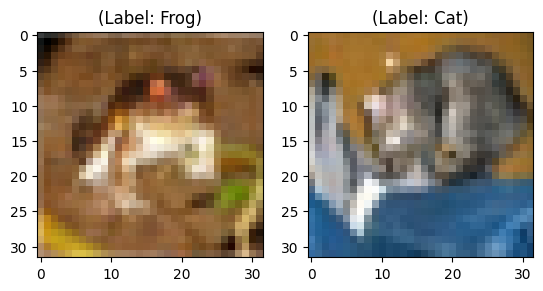

In [23]:
#display 1st image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_train[0][0]]) + ")"))

#display 1st image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_list[y_test[0][0]]) + ")"))

# Draw a random percentage of the Dataset

In [24]:
# Random percentage sampler

def random_percentage_sample(x_data, y_data, sample_percentage=0.05):
    # Check if x_data and y_data have the same length
    if len(x_data) != len(y_data):
        raise ValueError("x_data and y_data must have the same length.")

    num_samples = int(len(x_data) * sample_percentage)

    # Generate random indices for sampling
    random_indices = np.random.choice(len(x_data), num_samples, replace=False)

    # Extract the sampled data and labels based on the random indices
    sampled_x_data = x_data[random_indices]
    sampled_y_data = y_data[random_indices]

    return sampled_x_data, sampled_y_data

# Example usage:
# Assuming x_train contains the data and y_train contains the labels
sampled_x_train, sampled_y_train = random_percentage_sample(x_train, y_train, sample_percentage=0.05)

print(sampled_x_train.shape, sampled_y_train.shape)

(2500, 32, 32, 3) (2500, 1)


# Plot the Dataset by using PCA and plot the Sampled Dataset in black

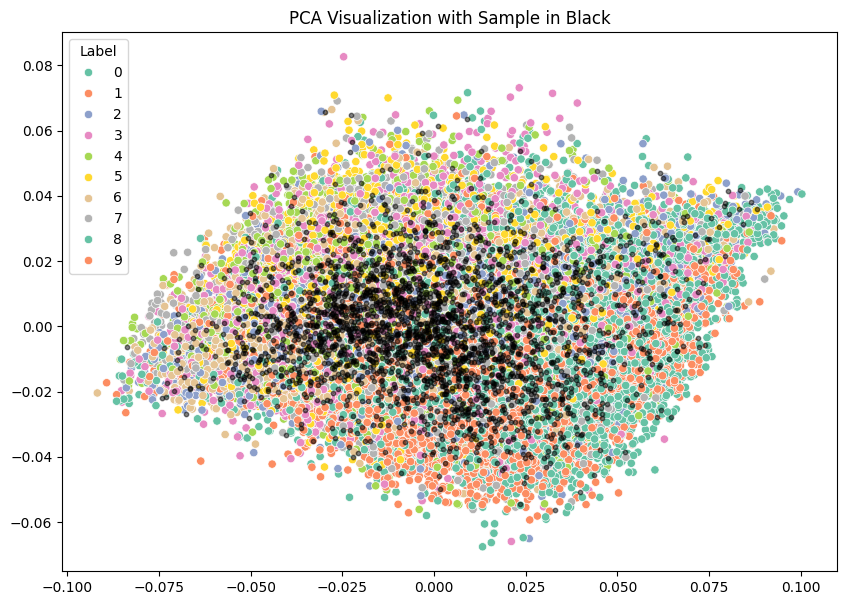

In [36]:
# Around 5sec to run

def plot_PCA_with_sample(all_data, sampled_data, point_size=10, alpha_value=0.5):
    # Separate the input tuples into x and y data
    all_x_data, all_y_data = all_data
    sampled_x_data, sampled_y_data = sampled_data

    # Normalize the data
    all_x_data_normalized = all_x_data / 255.0
    sampled_x_data_normalized = sampled_x_data / 255.0

    # Flatten images in the datasets
    all_flat = all_x_data_normalized.reshape(all_x_data_normalized.shape[0], -1)
    sampled_flat = sampled_x_data_normalized.reshape(sampled_x_data_normalized.shape[0], -1)

    # Perform PCA on all_data
    pca_all = PCA(n_components=2)
    principal_all = pca_all.fit_transform(all_flat)

    # Perform PCA on sampled_data
    pca_sampled = PCA(n_components=2)
    principal_sampled = pca_sampled.fit_transform(sampled_flat)

    # Create a scatterplot for the PCA space
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=principal_all[:, 0], y=principal_all[:, 1],
        hue="Label",
        palette=sns.color_palette("Set2", 10),
        data=pd.DataFrame({
            "Principal Component 1": principal_all[:, 0],
            "Principal Component 2": principal_all[:, 1],
            "Label": all_y_data.flatten()
        }),
        legend="full",
        alpha=1
    )

    # Plot the sampled data with adjusted size and alpha
    plt.scatter(
        principal_sampled[:, 0], principal_sampled[:, 1],
        color="black",
        marker="o",
        label="Sample",
        s=point_size,  # Adjust the point size
        alpha=alpha_value,  # Adjust the transparency
    )

    plt.title(f"PCA Visualization with Sample in Black")
    plt.show()

# Example usage:
# Assuming x_train contains the entire dataset and y_train contains the corresponding labels
# and sampled_x_train, sampled_y_train are the sampled data
plot_PCA_with_sample((x_train, y_train), (sampled_x_train, sampled_y_train))


# Plot the Dataset by using t-SNE and plot the Sampled Dataset in Black

c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


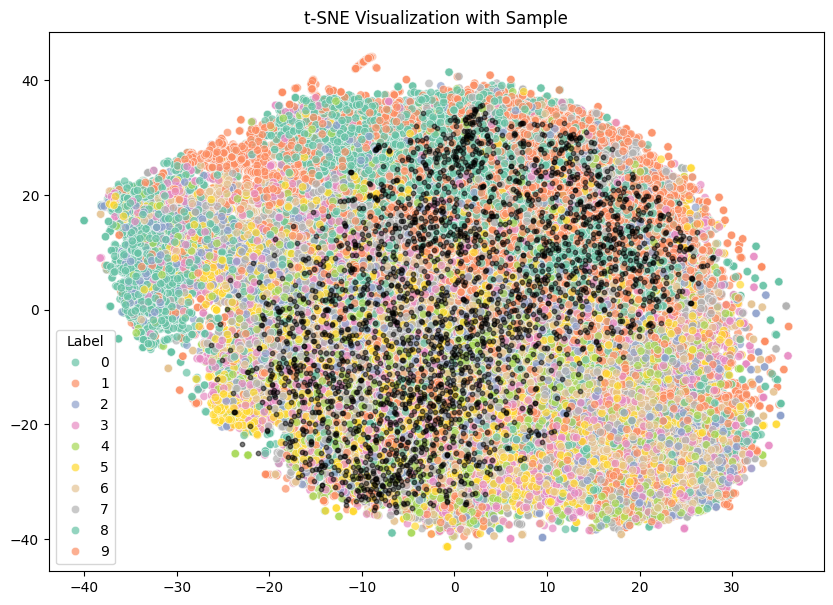

In [35]:
# Around 7min to run

def plot_TSNE_with_sample(all_data, sampled_data, point_size=10, alpha_value=0.5):
    # Separate the input tuples into x and y data
    all_x_data, all_y_data = all_data
    sampled_x_data, sampled_y_data = sampled_data

    # Normalize the data
    all_x_data_normalized = all_x_data / 255.0
    sampled_x_data_normalized = sampled_x_data / 255.0

    # Flatten images in the datasets
    all_flat = all_x_data_normalized.reshape(all_x_data_normalized.shape[0], -1)
    sampled_flat = sampled_x_data_normalized.reshape(sampled_x_data_normalized.shape[0], -1)

    # Perform t-SNE on all_data
    tsne_all = TSNE(n_components=2)
    principal_all = tsne_all.fit_transform(all_flat)

    # Perform t-SNE on sampled_data
    tsne_sampled = TSNE(n_components=2)
    principal_sampled = tsne_sampled.fit_transform(sampled_flat)

    # Create a scatterplot for the t-SNE space
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=principal_all[:, 0], y=principal_all[:, 1],
        hue="Label",
        palette=sns.color_palette("Set2", 10),
        data=pd.DataFrame({
            "TSNE Component 1": principal_all[:, 0],
            "TSNE Component 2": principal_all[:, 1],
            "Label": all_y_data.flatten()
        }),
        legend="full",
        alpha=0.7
    )

    # Plot the sampled data with adjusted size and alpha
    plt.scatter(
        principal_sampled[:, 0], principal_sampled[:, 1],
        color="black",
        marker="o",
        label="Sample",
        s=point_size,  # Adjust the point size
        alpha=alpha_value,  # Adjust the transparency
    )

    plt.title(f"t-SNE Visualization with Sample")
    plt.show()

# Example usage:
# Assuming x_train contains the entire dataset and y_train contains the corresponding labels
# and sampled_x_train, sampled_y_train are the sampled data
plot_TSNE_with_sample((x_train, y_train), (sampled_x_train, sampled_y_train))
